In [ ]:
# @title
from google.colab import files
uploaded = files.upload()


Saving burnout-image.jpeg to burnout-image.jpeg


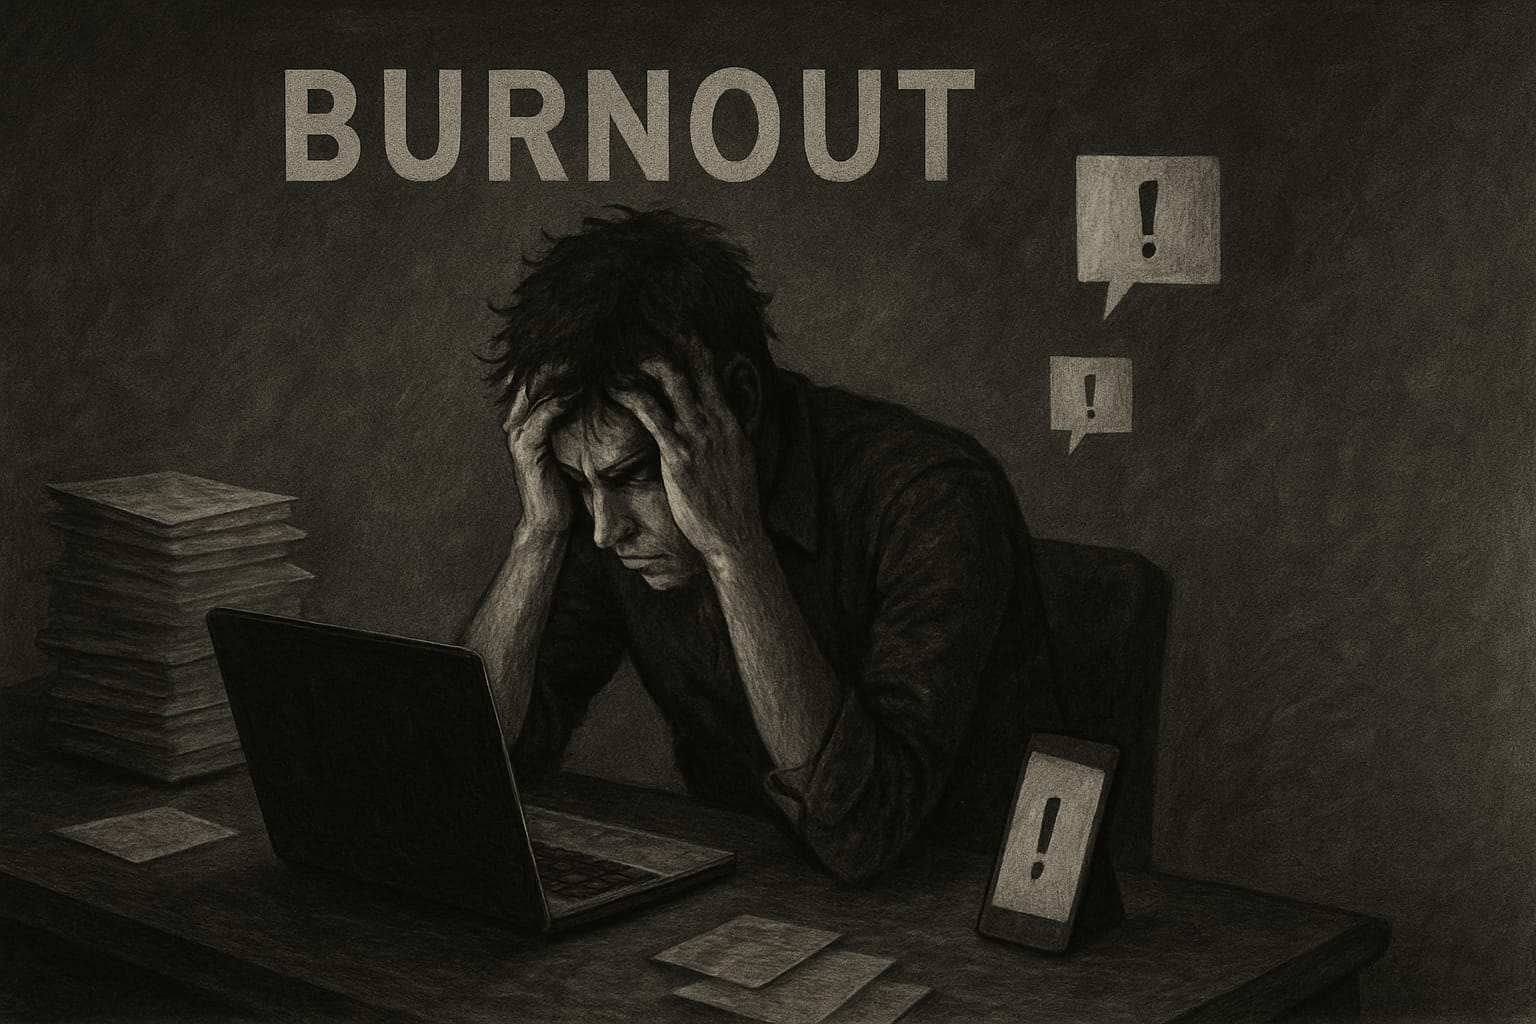

In [ ]:
# @title
from IPython.display import Image, display

display(Image('burnout-image.jpeg'))


# **Introdução**

*Impacto do Burnout*
---

---




O burnout, também conhecido como síndrome do esgotamento profissional, é um estado de exaustão física, mental e emocional causado por estresse excessivo e prolongado relacionado ao trabalho. Ele é caracterizado por sentimentos de esgotamento, cinismo em relação ao trabalho e redução da eficácia profissional.

No cenário atual, com demandas crescentes no ambiente de trabalho e maior conectividade, o burnout tem se tornado uma preocupação significativa. Sua ocorrência impacta tanto a saúde mental dos indivíduos quanto a produtividade e os custos para as empresas.

O objetivo deste projeto é utilizar técnicas de análise de dados e machine learning para prever o risco de burnout em profissionais de tecnologia. A previsão pode ajudar organizações a identificar fatores de risco e implementar medidas preventivas, como oferecer suporte adequado aos funcionários, promovendo um ambiente de trabalho mais saudável.

Este estudo utiliza o dataset "Mental Health in Tech Professionals", que combina dados de pesquisas realizadas entre 2017 e 2021 pela organização Open Sourcing Mental Illness. O dataset inclui informações sobre a presença de questões de saúde mental entre profissionais do setor de tecnologia e as atitudes em relação à saúde mental no ambiente de trabalho.

Com este projeto, esperamos não apenas prever o burnout, mas também contribuir para o entendimento das relações entre o ambiente de trabalho e a saúde mental, ajudando a fomentar iniciativas de apoio aos trabalhadores e a reduzir o impacto dessa condição no cenário profissional.


---



### *Descrição das Variáveis*

| Nome da Variável          | Descrição                                 | Tipo     |
|---------------------------|------------------------------------------|----------|
| `tech_company`            | Trabalha em empresa de tecnologia        | object   |
| `benefits`                | Benefícios de saúde mental oferecidos    | object   |
| `workplace_resources`     | Recursos para saúde mental no trabalho   | object   |
| `mh_employer_discussion`  | Discussão sobre saúde mental com empregador | object |
| `mh_coworker_discussion`  | Discussão sobre saúde mental com colegas | object   |
| `medical_coverage`        | Cobertura médica para saúde mental      | object   |
| `mental_health`           | Diagnóstico ou suspeita de transtorno mental | object |
| `mh_share`               | Nível de conforto para compartilhar questões (0-10) | int64 |
| `age`                    | Idade do respondente                    | float64  |
| `gender`                 | Gênero do respondente                   | object   |
| `country`                | País de residência                      | object   |
| `burnout`                | Risco de burnout (derivado de mental_health) | int64 |    


# **Importar Bibliotecas**

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier, plot_importance

%matplotlib inline

# **Exploração de Dados**

In [57]:
# Carregar o dataset
df = pd.read_csv("data_copia.csv")

In [58]:
# Exibir as 5 primeiras linhas
df.head()

,tech_company,benefits,workplace_resources,mh_employer_discussion,mh_coworker_discussion,medical_coverage,mental_health,mh_share,age,gender,country
0,Yes,No,I don't know,No,Yes,Yes,Possibly,5,27.0,Female,United Kingdom
1,Yes,Yes,No,No,Yes,Yes,Possibly,4,31.0,Male,United Kingdom
2,Yes,I don't know,No,Yes,Yes,No,Yes,5,36.0,Male,United States of America
3,Yes,Yes,I don't know,Yes,Yes,Yes,Yes,10,22.0,Male,United States of America
4,Yes,Yes,No,No,Yes,Yes,Yes,8,36.0,Female,United States of America


In [59]:
# Verificar se há valores ausentes
df.isnull().sum()

,0
tech_company,0
benefits,0
workplace_resources,0
mh_employer_discussion,0
mh_coworker_discussion,0
medical_coverage,0
mental_health,0
mh_share,0
age,0
gender,0




---



*   Análise individual de cada coluna



In [60]:
# Definir uma paleta de cores
colors = sns.color_palette('Paired')

In [61]:
# Filtrar a frequência de cada resposta na coluna tech_company
(df['tech_company'].value_counts(normalize=True) * 100).round(1).to_frame(name="Porcentagem (%)").style.background_gradient(cmap='Blues')

,Porcentagem (%)
tech_company,
Yes,72.400000
No,27.600000


72,4% dos profissionais pesquisados atuam em tecnologia, evidenciando os desafios específicos do setor (cobrança por resultados, jornadas extensas) e a relevância do estudo para esse contexto, onde o burnout é comum mas pouco reportado. Os 27,6% de outros setores permitem análises comparativas limitadas.


---



In [62]:
# Filtrar a frequência de cada resposta na coluna benefits
(df['benefits'].value_counts(normalize=True) * 100).round(1).to_frame(name="Porcentagem (%)").style.background_gradient(cmap='Blues')

,Porcentagem (%)
benefits,
Yes,62.900000
I don't know,24.800000
No,12.300000


62,9% dos profissionais relatam ter benefícios de saúde mental, mas 24,8% desconhecem e 12,3% não os possuem, indicando lacunas na comunicação ou eficácia dessas iniciativas.


---



In [63]:
# Filtrara frequência de cada resposta na coluna workplace_resources
(df['workplace_resources'].value_counts(normalize=True) * 100).round(1).to_frame(name="Porcentagem (%)").style.background_gradient(cmap='Blues')

,Porcentagem (%)
workplace_resources,
No,37.400000
Yes,34.700000
I don't know,27.900000


Apenas 34,7% dos profissionais têm acesso a recursos de saúde mental no trabalho, enquanto 37,4% não possuem e 27,9% desconhecem, o que pode ampliar riscos de burnout por falta de suporte estruturado.


---



In [64]:
# Filtrar a frequência de cada resposta na coluna mh_employer_discussion
(df['mh_employer_discussion'].value_counts(normalize=True) * 100).round(1).to_frame(name="Porcentagem (%)").style.background_gradient(cmap='Blues')

,Porcentagem (%)
mh_employer_discussion,
No,67.000000
Yes,33.000000


67% das empresas não discutem saúde mental com seus colaboradores, contra apenas 33% que abordam o tema, uma omissão preocupante em um setor onde pressões e riscos de burnout são intensos.


---



In [65]:
# Filtrar a frequência de cada resposta na mh_coworker_discussion
(df['mh_coworker_discussion'].value_counts(normalize=True) * 100).round(1).to_frame(name="Porcentagem (%)").style.background_gradient(cmap='Blues')

,Porcentagem (%)
mh_coworker_discussion,
No,54.700000
Yes,45.300000


54,7% dos profissionais não discutem saúde mental com colegas, contra 45,3% que têm esse diálogo, esse silêncio pode agravar sentimentos de isolamento e dificultar a busca por apoio.


---



In [66]:
# Filtrar a frequência de cada resposta na coluna medical_coverage
(df['medical_coverage'].value_counts(normalize=True) * 100).round(1).to_frame(name="Porcentagem (%)").style.background_gradient(cmap='Blues')

,Porcentagem (%)
medical_coverage,
Yes,92.400000
No,7.600000


92,4% dos profissionais de tecnologia possuem plano de saúde, contra 7,6% sem cobertura médica, uma rede de segurança importante, mas que deixa uma parcela vulnerável sem acesso a tratamentos de saúde mental.


---



In [67]:
# Filtrar a frequência de cada resposta na coluna mental_health
(df['mental_health'].value_counts(normalize=True) * 100).round(1).to_frame(name="Porcentagem (%)").style.background_gradient(cmap='Blues')

,Porcentagem (%)
mental_health,
Yes,44.500000
No,27.800000
Possibly,20.700000
Don't Know,7.000000


44,5% dos profissionais relatam problemas de saúde mental, enquanto 20,7% suspeitam ter ('Possibly') e 27,8% afirmam não ter. Os 7% que 'não sabem' revelam uma preocupante falta de autopercepção sobre o tema, sinal de que muitas empresas falham em educar seus times sobre saúde mental.


---



In [68]:
# Filtrar a distribuição de idade
df[['age']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,1242.0,35.03,8.19,19.0,29.0,34.0,40.0,66.0


A tabela nos mostra que os profissionais são majoritariamente jovens (média de 35 anos, com 50% entre 29-40 anos), refletindo o perfil do setor de tecnologia.


---



In [69]:
# Filtrar a distribuição de mh_share
df[['mh_share']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
mh_share,1242.0,6.57,2.7,0.0,5.0,7.0,9.0,10.0


A disposição para falar sobre saúde mental varia bastante entre profissionais de tecnologia:

* Média: 6.6/10

* Metade marca entre 5 e 9

* 25% estão pouco confortáveis

* 25% estão muito confortáveis

Isso mostra que, apesar de uma tendência positiva, ainda há uma parcela significativa que evita o tema, possivelmente por medo de julgamento no ambiente de trabalho.


---



In [70]:
# Filtrar a distribuição de pessoas de cada gênero
(df['gender'].value_counts(normalize=True) * 100).round(1).to_frame(name="Porcentagem (%)").style.background_gradient(cmap='Blues')

,Porcentagem (%)
gender,
Male,65.500000
Female,30.200000
Other,4.300000



A tabela nos revela o desequilíbrio de gênero do setor de tecnologia: 65,5% homens, 30,2% mulheres e 4,3% outros. Essa distribuição desigual exige cautela ao analisar saúde mental por gênero, já que fatores culturais podem influenciar os resultados.


---



In [71]:
# Filtrar a distribuição de participantes de cada país
top_countries = df['country'].value_counts(normalize=True).head(5)
top_countries['Others'] = df['country'].value_counts(normalize=True)[5:].sum()
(top_countries * 100).round(1).to_frame(name="Porcentagem (%)").style.background_gradient(cmap='Blues')

,Porcentagem (%)
country,
United States of America,76.200000
United Kingdom,7.600000
Canada,3.000000
Germany,2.700000
Spain,1.800000
Others,8.700000


6,2% dos respondentes são dos EUA, seguidos por Reino Unido (7,6%) e Canadá (3%). Os 8,7% restantes se distribuem entre outros países com pouca representatividade individual. Essa concentração limita análises regionais, mas reforça que os resultados refletem principalmente a realidade norte-americana do setor de tecnologia.

---



*   Correlações

Neste ponto, vamos analisar as correlações entre as variáveis do dataset, com o objetivo de identificar relações e padrões relevantes que possam indicar fatores associados ao burnout em profissionais da área de tecnologia. Descartaremos a coluna 'country', pois seria errado considerarmos que um determinado país enfrenta mais problemas com a saúde mental dos funcionários apenas porque cerca de 76,24% das pessoas pertencem aos Estados Unidos. Além de que há muitos países com apenas um respondente, logo a coluna se torna irrelevante.

In [72]:
# Descartar a coluna country
df = df.drop(columns=['country'])

In [73]:
#  Converter mental_health para burnout - binário
df['burnout'] = df['mental_health'].apply(lambda x: 1 if x in ['Yes', 'Possibly'] else 0)

# Converter colunas categóricas para numéricas
cols_categoricas = ['tech_company', 'benefits', 'workplace_resources', 'mh_employer_discussion', 'mh_coworker_discussion','medical_coverage', 'gender']

# Transforma colunas categórica em números inteiros
le = LabelEncoder()
for col in cols_categoricas:
    df[col] = le.fit_transform(df[col])

In [74]:
# Cria uma cópia do DataFrame original
df_corr = df.copy()

# Remove a coluna textual original
df_corr = df.drop(columns=['mental_health'])

# Calcula a matriz de correlação
matriz_corr = df_corr.corr()

print("Matriz de Correlação:")
matriz_corr.transpose()

Matriz de Correlação:


,tech_company,benefits,workplace_resources,mh_employer_discussion,mh_coworker_discussion,medical_coverage,mh_share,age,gender,burnout
tech_company,1.000000,-0.021836,-0.065192,0.108101,0.092182,-0.049028,0.056911,-0.077573,-0.002217,-0.046523
benefits,-0.021836,1.000000,0.323256,0.179849,0.226106,0.400807,0.147837,0.073441,-0.024521,0.147269
workplace_resources,-0.065192,0.323256,1.000000,0.156315,0.136432,0.098041,0.065578,0.031889,-0.085236,0.050556
mh_employer_discussion,0.108101,0.179849,0.156315,1.000000,0.454501,0.092512,0.223328,0.020181,0.025840,0.246640
mh_coworker_discussion,0.092182,0.226106,0.136432,0.454501,1.000000,0.116010,0.280676,0.007070,-0.068914,0.305036
medical_coverage,-0.049028,0.400807,0.098041,0.092512,0.116010,1.000000,0.048661,0.020325,0.031261,0.044247
mh_share,0.056911,0.147837,0.065578,0.223328,0.280676,0.048661,1.000000,-0.010373,-0.010866,0.147906
age,-0.077573,0.073441,0.031889,0.020181,0.007070,0.020325,-0.010373,1.000000,0.081610,-0.050361
gender,-0.002217,-0.024521,-0.085236,0.025840,-0.068914,0.031261,-0.010866,0.081610,1.000000,-0.062940
burnout,-0.046523,0.147269,0.050556,0.246640,0.305036,0.044247,0.147906,-0.050361,-0.062940,1.000000


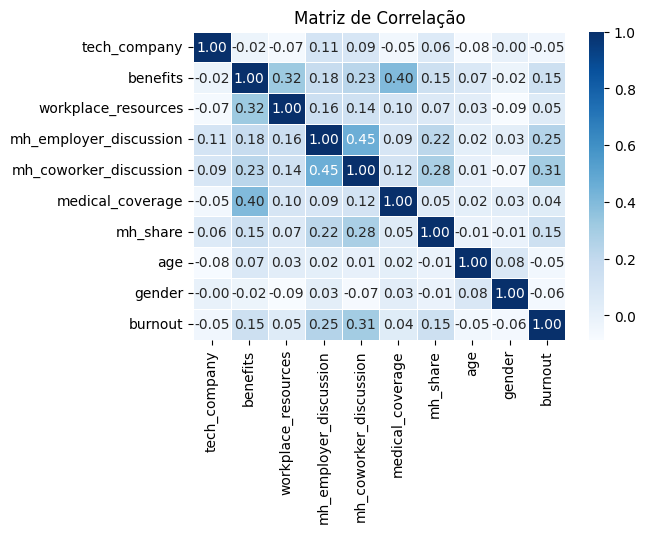

In [75]:
# Plot da matriz
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

A análise revela que:

* Falar abertamente sobre saúde mental (especialmente com colegas) é o fator mais ligado à redução de burnout

* Benefícios tradicionais têm impacto limitado sem cultura de apoio

* Idade e gênero são menos relevantes que políticas da empresa.



---



# **Modelagem Preditiva**

In [76]:
# Define a lista de colunas que serão usadas como variáveis independentes (features)
features = ['age', 'gender', 'benefits', 'workplace_resources',
            'mh_employer_discussion', 'mh_coworker_discussion']

# Define a variável alvo
target = 'burnout'

X = df[features] # Separa os dados de entrada (X)
y = df[target] # Separa os dados de saída (Y)

In [77]:
# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [78]:
# Cria um modelo de Random Forest com 100 árvores, balanceando as classes
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

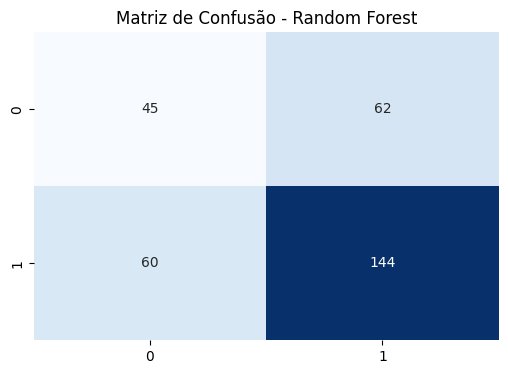

In [80]:
# Avaliação - Random Forest
y_pred_rf = rf.predict(X_test)

# Gerar a matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

In [81]:
print("\nRelatório (RF):\n", classification_report(y_test, y_pred_rf))


Relatório (RF):
               precision    recall  f1-score   support

           0       0.43      0.42      0.42       107
           1       0.70      0.71      0.70       204

    accuracy                           0.61       311
   macro avg       0.56      0.56      0.56       311
weighted avg       0.61      0.61      0.61       311



In [82]:
# Cria um modelo XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:44:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

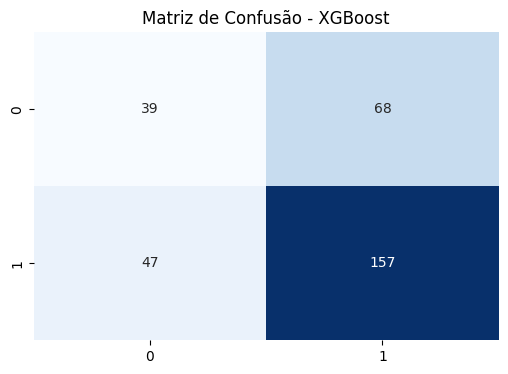

In [83]:
# Avaliação - XGBoost
y_pred_xgb = xgb.predict(X_test)

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão - XGBoost")
plt.show()

In [84]:
print("\nRelatório (XGB):\n", classification_report(y_test, y_pred_xgb))


Relatório (XGB):
               precision    recall  f1-score   support

           0       0.45      0.36      0.40       107
           1       0.70      0.77      0.73       204

    accuracy                           0.63       311
   macro avg       0.58      0.57      0.57       311
weighted avg       0.61      0.63      0.62       311



 **Avaliação Random Forest vs XBG**

Em comparação, o XGBoost detecta 6% mais casos de burnout que o Random Forest (77% vs 71% de recall), mas com mais falsos positivos. Apesar da leve vantagem em acurácia (63% vs 61%), ambos falham em mais de 20% dos casos.

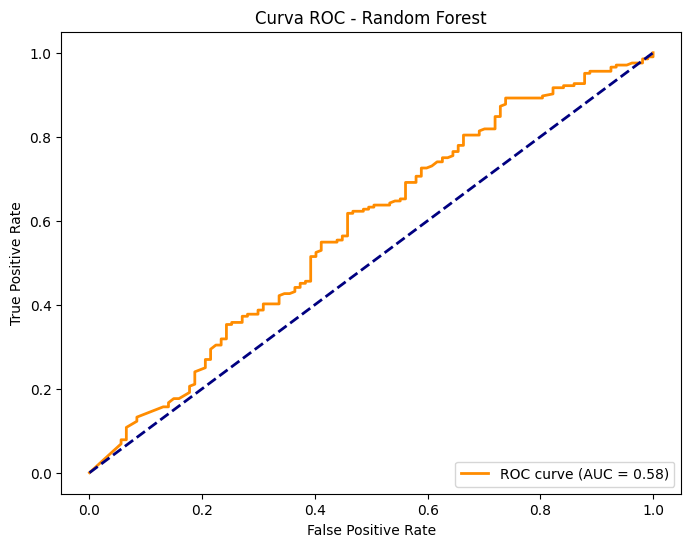

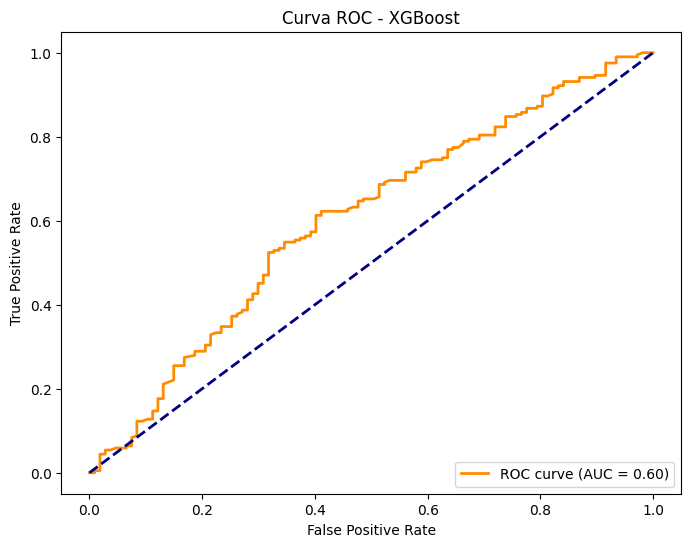

AUC Random Forest: 0.580
AUC XGBoost: 0.603


In [85]:
# Função para plotar a curva ROC
def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

# Calcular probabilidades
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]  # Random Forest
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]  # XGBoost

# Plot
auc_rf = plot_roc_curve(y_test, y_pred_prob_rf, "Random Forest")
auc_xgb = plot_roc_curve(y_test, y_pred_prob_xgb, "XGBoost")

print(f"AUC Random Forest: {auc_rf:.3f}")
print(f"AUC XGBoost: {auc_xgb:.3f}")

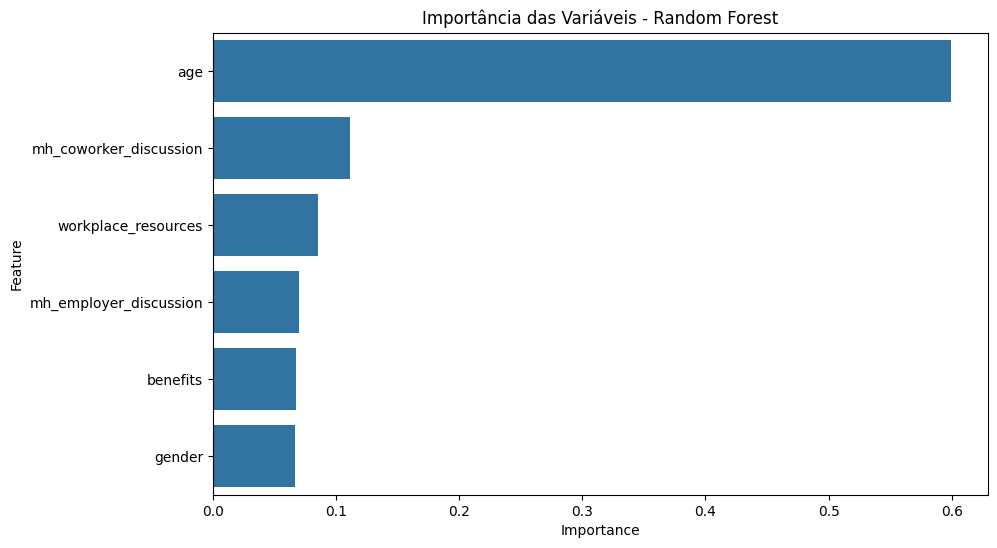

Importância Relativa (RF):


,Feature,Importance
0,age,0.599366
5,mh_coworker_discussion,0.111192
3,workplace_resources,0.085130
4,mh_employer_discussion,0.070274
2,benefits,0.067289
1,gender,0.066750


In [86]:
# Extrair importância
rf_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=rf_importance)
plt.title('Importância das Variáveis - Random Forest')
plt.show()

print("Importância Relativa (RF):")
rf_importance

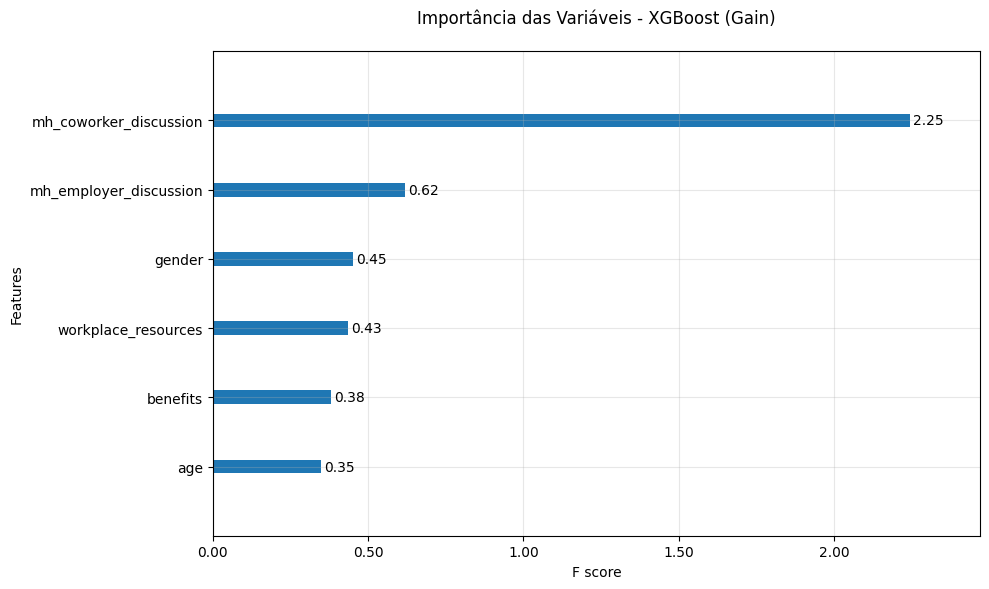

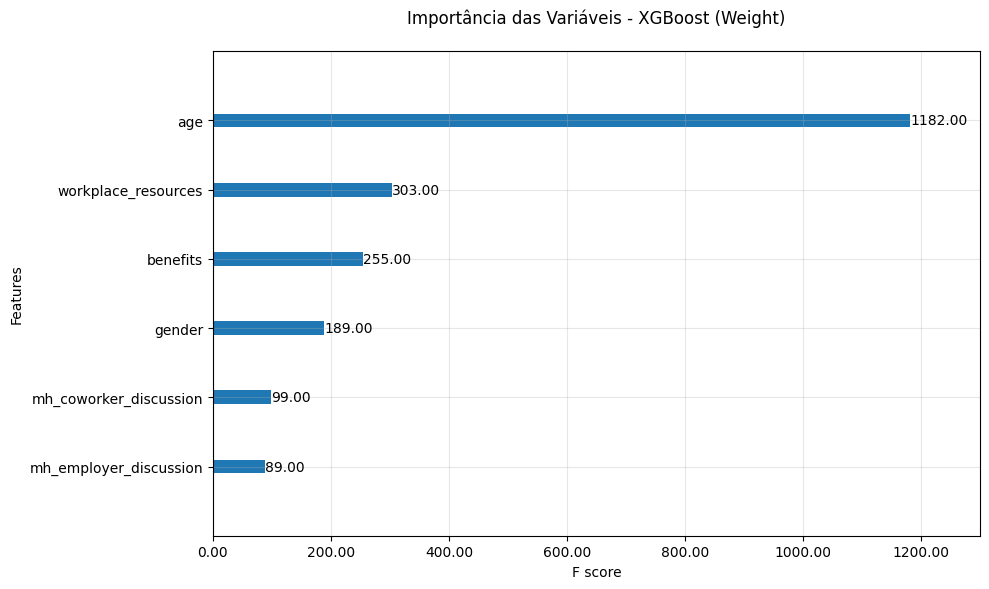

In [88]:
# Extrair importância
def plot_xgb_importance_aligned(model, importance_type='gain', max_num_features=10, figsize=(10,6)):
    fig, ax = plt.subplots(figsize=figsize)

    # Plota a importância com o plot_importance
    plot_importance(model, importance_type=importance_type,
                   ax=ax, max_num_features=max_num_features,
                   show_values=False)

    # Ordena as features pela importância e seleciona as top max_num_features
    importance = model.get_booster().get_score(importance_type=importance_type)
    features = sorted(importance.items(), key=lambda x: x[1])[-max_num_features:]

    # Adiciona os valores das importâncias ao lado de cada barra do gráfico
    for i, (feature, score) in enumerate(features):
        ax.text(score + 0.01, i, f"{score:.2f}",
                va='center', ha='left', fontsize=10)

    # Formata o eixo x para exibir números com 2 casas decimais
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.grid(True, alpha=0.3)
    ax.set_title(f'Importância das Variáveis - XGBoost ({importance_type.capitalize()})', pad=20)
    plt.tight_layout()
    plt.show()

# PLot
plot_xgb_importance_aligned(xgb, importance_type='gain')
plot_xgb_importance_aligned(xgb, importance_type='weight')

# **Conclusão**

Este projeto investigou o risco de burnout em profissionais de tecnologia a partir de variáveis relacionadas ao ambiente de trabalho e dados pessoais. Após explorar o conjunto de dados (“Mental Health in Tech Professionals”), observamos que fatores como oferta de benefícios de saúde mental, acesso a recursos no trabalho e a abertura para discutir saúde mental (especialmente entre colegas) são potencialmente ligados à menor ocorrência de burnout. Já variáveis como idade e gênero tiveram correlações mais fracas.

Na etapa de modelagem, utilizamos Random Forest e XGBoost para classificar se um profissional apresenta sintomas compatíveis com burnout. Ambos os modelos alcançaram resultados modestos.

A análise de importância de variáveis revelou que, no Random Forest, a idade foi a variável com maior peso, indicando que a faixa etária impacta, embora não explique o burnout por completo. Em seguida, aparecem a discussão de saúde mental com colegas e o acesso a recursos no trabalho, reforçando que um ambiente que estimula o diálogo e oferece suporte pode reduzir o risco. Por fim, benefícios de saúde mental e conversa com o empregador também contribuem, ainda que em menor grau.



> **Considerações finais**

> Embora o modelo não seja suficiente para decisões clínicas isoladas, ele sugere que empresas que incentivam o diálogo aberto sobre saúde mental e disponibilizam recursos concretos, como programas de apoio ou canal de comunicação dedicado, conseguem reduzir o risco de burnout entre seus colaboradores.

> Os resultados do modelo indicam que outras variáveis, por exemplo, carga horária, tipo de projeto ou qualidade de vida fora do trabalho podem ajudar a melhorar a previsão. Em estudos futuros, seria interessante reunir esses dados extras ou acompanhar as pessoas ao longo do tempo para tornar o modelo mais preciso.